# Table of Contents
* [Run OCR service](#Run-OCR-service)
* [Run directly](#Run-directly)
    * [code](#code)
	* [run](#run)
* [program execution](#program-execution)
* [End](#End)


This notebook compares contains early tests of the tableparse service

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import cv2
import pprint
import pickle
import json
import requests
import io

from IPython.display import display
import PIL.Image as Image

# Run OCR service

In [4]:
def query_vision_tp(image_url):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'url': image_url,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
    print(response.content)
    json_response = json.loads(response.content.decode())
    if as_json:
        response = json_response
    return response

In [5]:
def query_vision_tp_bytes(image):
    api_entry_point = 'http://0.0.0.0:8200/v1/tableparse'
    header = {'Content-Type': 'application/json'}
    request_data = {
        'image': image,
    }
    json_data = json.dumps(request_data)
    response = requests.post(api_entry_point, data=json_data, headers=header)
#     print(response.content)
    json_response = json.loads(response.content.decode())
    if json_response:
        response = json_response
    return response

In [6]:
ex_1 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/example_1.png'
ex_2 = '/Users/schwenk/wrk/tableparse/vision-tableparse/examples/sight-word-bingo.png'

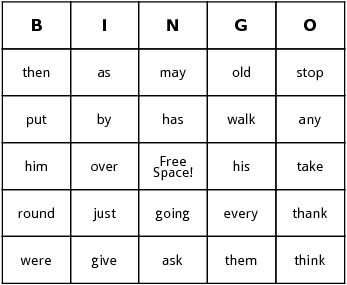

In [7]:
b64_image = base64.b64encode(open(ex_2, 'rb').read())
WImage(filename=ex_2)

In [68]:
%load_ext snakeviz

In [69]:
%snakeviz tp_response = query_vision_tp_bytes(b64_image)

 
*** Profile stats marshalled to file u'/var/folders/89/qnfd36sx1rs246whpmhw3gh00000gq/T/tmpHrw0f4'. 


In [8]:
%%prun 
tp_response = query_vision_tp_bytes(b64_image)

In [9]:
tp_response['columns']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 3, u'y': 144}, {u'x': 69, u'y': 188}],
   u'value': u'him'},
  {u'rectangle': [{u'x': 3, u'y': 191}, {u'x': 69, u'y': 234}],
   u'value': u'round'},
  {u'rectangle': [{u'x': 3, u'y': 237}, {u'x': 69, u'y': 281}],
   u'value': u'Were'}],
 [{u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'value': u'by'},
  {u'rectangle': [{u'x': 72, u'y': 144}, {u'x': 137, u'y': 188}],
   u'value': u'Over'},
  {u'rectangle': [{u'x': 72, u'y': 191}, {u'x': 137, u'y': 234}],
   u'value': u'just'},
  {u'rectangle': [{u'x': 72, u'y': 237}, {u'x': 137, u'y': 281

In [63]:
tp_response['rows']

[[{u'rectangle': [{u'x': 3, u'y': 3}, {u'x': 69, u'y': 47}], u'value': u'B'},
  {u'rectangle': [{u'x': 72, u'y': 3}, {u'x': 137, u'y': 47}], u'value': u''},
  {u'rectangle': [{u'x': 140, u'y': 3}, {u'x': 205, u'y': 47}],
   u'value': u'N'},
  {u'rectangle': [{u'x': 208, u'y': 3}, {u'x': 274, u'y': 47}],
   u'value': u'G'},
  {u'rectangle': [{u'x': 277, u'y': 3}, {u'x': 343, u'y': 47}],
   u'value': u'O'}],
 [{u'rectangle': [{u'x': 3, u'y': 50}, {u'x': 69, u'y': 94}],
   u'value': u'then'},
  {u'rectangle': [{u'x': 72, u'y': 50}, {u'x': 137, u'y': 94}],
   u'value': u'as'},
  {u'rectangle': [{u'x': 140, u'y': 50}, {u'x': 205, u'y': 94}],
   u'value': u'may'},
  {u'rectangle': [{u'x': 208, u'y': 50}, {u'x': 274, u'y': 94}],
   u'value': u'old'},
  {u'rectangle': [{u'x': 277, u'y': 50}, {u'x': 343, u'y': 94}],
   u'value': u'stop'}],
 [{u'rectangle': [{u'x': 3, u'y': 97}, {u'x': 69, u'y': 141}],
   u'value': u'put'},
  {u'rectangle': [{u'x': 72, u'y': 97}, {u'x': 137, u'y': 141}],
   u'va

# Run directly

## code

In [9]:
def run_detect(image_path):
    import ai2.vision.tableparse
    import cv2
    print(image_path)
    image = Image.open(image_path)
    #resized = image.resize(tuple(map(lambda y: round(y * float(ratio)), image.size)), PIL.Image.LANCZOS)
    #resized.save(image_path + ".tmp-resized.png")
    #image_path = image_path + ".tmp-resized.png"
    #image = Image.open(image_path)
    print(image.size)

    colors = [
            (255, 0, 0),
            (0, 255, 0),
            (0, 0, 255),
            (255, 255, 0),
            (0, 255, 255),
            (255, 0, 255),

            (128, 0, 0),
            (0, 128, 0),
            (0, 0, 128),
            (128, 128, 0),
            (0, 128, 128),
            (128, 0, 128),

            (255, 128, 0),
            (0, 128, 255),
            (128, 255, 0),
            (0, 255, 128),
            (255, 0, 128),
            (128, 0, 255)
    ]
    rows, columns = ai2.vision.tableparse.detect(image)
    from pprint import pprint
    color_counter = 0

    image_1 = cv2.imread(image_path)
    print("rows *** %s" % len(rows))
    for row in rows:
        print("cells %s" % len(row.cells))
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_1, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    image_2= cv2.imread(image_path)
    color_counter = 0
    print("columns *** %s" % (len(columns)))
    for row in columns:
        print("cells %s" % len(row.cells))
        #pprint(row.to_JSON())
        color = colors[color_counter]
        print('|'.join(list(map(lambda c: c.value, row.cells))))
        for cell in row.cells:
            cv2.rectangle(image_2, (cell.start_x + 1, cell.start_y + 1), (cell.end_x - 1, cell.end_y - 1), color=color, thickness=2)
        color_counter += 1

    return Image.fromarray(image_1), Image.fromarray(image_2)


def run_detect_only(image_path):
    import ai2.vision.tableparse
    print(image_path)
    image = Image.open(image_path)
    #resized = image.resize(tuple(map(lambda y: round(y * float(ratio)), image.size)), PIL.Image.LANCZOS)
    #resized.save(image_path + ".tmp-resized.png")
    #image_path = image_path + ".tmp-resized.png"
    #image = Image.open(image_path)
    print(image.size)

    colors = [
            (255, 0, 0),
            (0, 255, 0),
            (0, 0, 255),
            (255, 255, 0),
            (0, 255, 255),
            (255, 0, 255),

            (128, 0, 0),
            (0, 128, 0),
            (0, 0, 128),
            (128, 128, 0),
            (0, 128, 128),
            (128, 0, 128),

            (255, 128, 0),
            (0, 128, 255),
            (128, 255, 0),
            (0, 255, 128),
            (255, 0, 128),
            (128, 0, 255)
    ]
    rows, columns = ai2.vision.tableparse.detect(image)

    return rows, columns

## run

In [10]:
test_image = './examples/example_1.png'

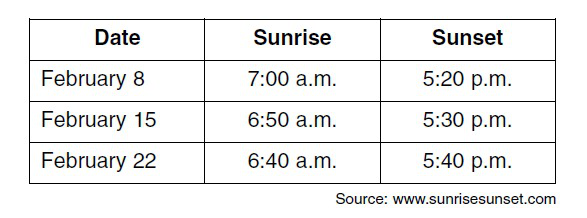

In [11]:
Image.open(test_image)

In [12]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [13]:
%%snakeviz
rows_marked, cols_marked = run_detect(test_image)

./examples/example_1.png
(587, 218)
rows *** 4
cells 3
Date|Sunrise|Sunset
cells 3
February 8|7:00 a.m.|5:20 p.m.
cells 3
February 15|6:50 a.m.|5:30 p.m.
cells 3
February 22|6:40 a.m.|5:40 p.m.
columns *** 3
cells 4
Date|February 8|February 15|February 22
cells 4
Sunrise|7:00 a.m.|6:50 a.m.|6:40 a.m.
cells 4
Sunset|5:20 p.m.|5:30 p.m.|5:40 p.m.
 
*** Profile stats marshalled to file '/var/folders/89/qnfd36sx1rs246whpmhw3gh00000gq/T/tmpuhj3i5tt'. 


In [96]:
complete_json = {"rows": [row.to_JSON() for row in rows_marked], "columns": [col.to_JSON() for col in cols_marked]}

In [98]:
with open('sight-word-bingo.json', 'w') as f:
    json.dump(complete_json, f)

In [90]:
with open('sight-word-bingo.json', 'r') as f:
    reloaded = json.load(f)

In [91]:
reloaded == complete_json

True

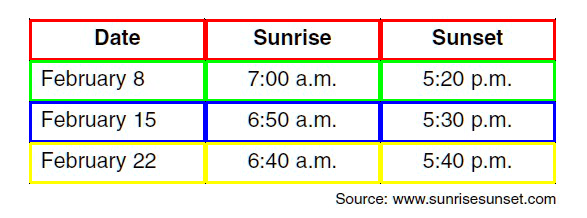

In [104]:
rows_marked

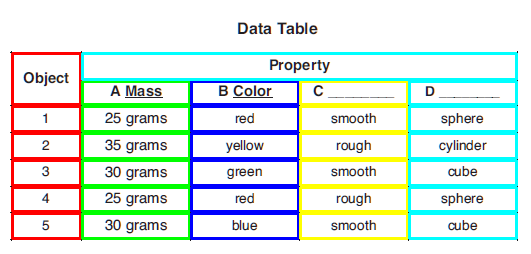

In [32]:
cols_marked

In [46]:
def detect_and_compare(image, expected_parse):
    import ai2.vision.tableparse
    rows, columns = ai2.vision.tableparse.detect(image)

    combined = {"rows": [row.to_JSON() for row in rows],
                "columns": [col.to_JSON() for col in columns]}

    with open(expected_parse, 'r') as f:
        gt_parse = json.load(f)

    return gt_parse, combined

In [50]:
gt, jr = detect_and_compare(Image.open('./examples/example_1.png'), '../test/gt_data/example_1.json')

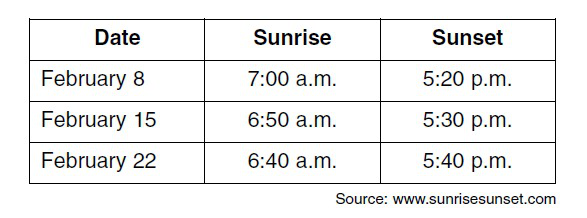

In [72]:
Image.open('./examples/example_1.png')

# program execution

In [35]:
trace_df = pd.read_csv('../vision-tableparse/funtions_run.csv', header=None)
trace_df.columns = ['file', 'module', 'funcname']
trace_df = trace_df.applymap(lambda x: x.split(':')[1])

In [39]:
trace_df['funcname'].value_counts()

 <module>                                     510
 <listcomp>                                    19
 __new__                                       11
 <lambda>                                      10
 <genexpr>                                      9
 <dictcomp>                                     6
 new                                            6
 _accept                                        6
 Error                                          5
 Parser                                         4
 <setcomp>                                      4
 HTTPError                                      4
 _LazyDescr.__init__                            3
 MovedModule.__init__                           3
 MovedAttribute                                 3
 _import_module                                 3
 Encoder                                        3
 NullHandler                                    3
 Attribute                                      3
 _LazyDescr.__get__                             3


# End

In [53]:
gt == jr

False

In [54]:
gt.keys()

dict_keys(['rows', 'columns'])

In [99]:
# list(gt.values())[1]

In [100]:
# list(jr.values())[1]